                                        Consumo de APIs - Resultado en tabla plana

Test:

1.- Consumir la API http://numbersapi.com/1..10

2.- Crear un dataFrame con los 1000 primeros números y descripciones

3.- Grabar la tabla en formato CSV

4.- Crear nueva columna con la longitud de la descripcion

5.- Mostrar en un histograma la distribución de longitudes de descripción


In [1]:
#__IMPORTAMOS TODAS LAS LIBRERIAS NECESARIAS__
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
import numpy as np


In [2]:
# 1.- Consumir la API http://numbersapi.com/1..10
APIurl = "http://numbersapi.com/"
list = []
for i in range(1,11):
    APIurlFor = APIurl+str((i*100)-99)+".."+str(i*100)
    APIresp = requests.get(APIurlFor)
    x = ast.literal_eval(APIresp.text)
    list.append(pd.DataFrame([[key, x[key]] for key in x.keys()], columns=['Number', 'Description']))
df = pd.concat(list)
df


,Number,Description
0,1,1 is the number of dimensions of a line.
1,2,2 is the number of stars in a binary star syst...
2,3,3 is the cost in cents to make a $1 bill in th...
3,4,4 is the number of characters in a canonical f...
4,5,5 is the number of dots in a quincunx.
5,6,6 is the number of feet below ground level a c...
6,7,7 is the number of colors of the rainbow.
7,8,8 is the number of legs that arachnids have.
8,9,"9 is the number of innings in a regulation, no..."
9,10,10 is the Number of dots in a tetractys.


In [3]:
# Rename dataFrame columns
df.rename( columns={"Number" :'numero'}, inplace=True)
df.rename( columns={"Description" :'descripcion'}, inplace=True)

# Convert string to float
print (df.dtypes)
df.numero = df.numero.astype(float)
print (df.dtypes)

numero         object
descripcion    object
dtype: object
numero         float64
descripcion     object
dtype: object


In [4]:
lenDescrip = []
for i in df['descripcion']:
    lenDescrip.append(len(i))
lenDescrip

[40,
 129,
 62,
 77,
 38,
 76,
 41,
 44,
 70,
 40,
 98,
 37,
 59,
 63,
 108,
 178,
 88,
 66,
 43,
 73,
 94,
 51,
 78,
 111,
 77,
 78,
 87,
 78,
 66,
 119,
 56,
 78,
 73,
 93,
 66,
 90,
 93,
 148,
 59,
 121,
 100,
 45,
 103,
 57,
 60,
 38,
 109,
 45,
 85,
 58,
 36,
 48,
 73,
 81,
 116,
 96,
 85,
 81,
 60,
 64,
 73,
 63,
 79,
 89,
 92,
 86,
 40,
 68,
 83,
 69,
 120,
 56,
 76,
 36,
 42,
 34,
 35,
 55,
 91,
 112,
 94,
 58,
 35,
 36,
 36,
 94,
 161,
 60,
 66,
 56,
 66,
 81,
 37,
 41,
 118,
 45,
 102,
 45,
 68,
 87,
 78,
 50,
 52,
 112,
 59,
 49,
 57,
 69,
 39,
 251,
 57,
 51,
 68,
 106,
 70,
 187,
 66,
 51,
 57,
 78,
 59,
 54,
 71,
 67,
 73,
 86,
 85,
 155,
 113,
 57,
 53,
 47,
 126,
 94,
 90,
 96,
 76,
 70,
 118,
 125,
 89,
 44,
 58,
 40,
 42,
 78,
 102,
 100,
 81,
 69,
 60,
 64,
 90,
 67,
 90,
 72,
 94,
 114,
 39,
 102,
 63,
 103,
 69,
 65,
 185,
 49,
 143,
 78,
 85,
 114,
 60,
 120,
 48,
 134,
 141,
 79,
 89,
 55,
 55,
 73,
 69,
 93,
 59,
 62,
 85,
 71,
 67,
 45,
 48,
 48,
 78,
 71,
 68,

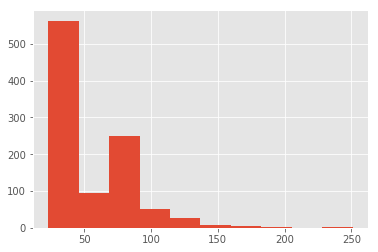

In [5]:
plt.style.use('ggplot')
plt.hist(lenDescrip, bins=10)
plt.show()

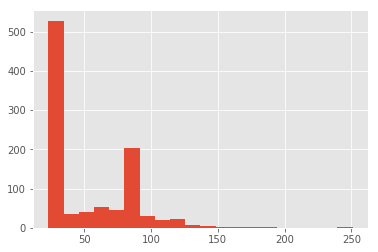

In [6]:
plt.hist(lenDescrip, bins=20)
plt.show()

In [7]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "numbers1000.csv"
df.to_csv(CSVfilename, index=False)